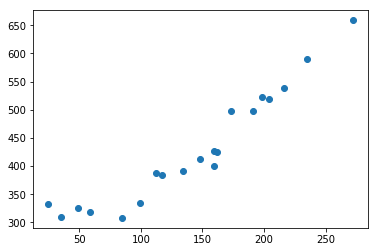

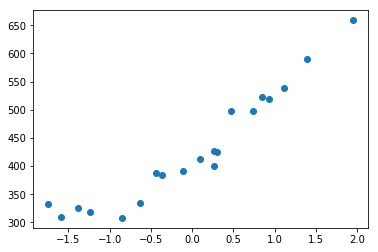

1回目 : theta0 = 8.724,theta1 = 2.828,差分=76270.574139
2回目 : theta0 = 17.133,theta1 = 4.641,差分=73250.259403
3回目 : theta0 = 25.373,theta1 = 6.418,差分=70349.549131
4回目 : theta0 = 33.449,theta1 = 8.159,差分=67563.706985
5回目 : theta0 = 41.363,theta1 = 9.866,差分=64888.184189
6回目 : theta0 = 49.118,theta1 = 11.538,差分=62318.612095
7回目 : theta0 = 56.719,theta1 = 13.177,差分=59850.795056
8回目 : theta0 = 64.168,theta1 = 14.783,差分=57480.703572
9回目 : theta0 = 71.467,theta1 = 16.357,差分=55204.467710
10回目 : theta0 = 78.621,theta1 = 17.899,差分=53018.370789
11回目 : theta0 = 85.631,theta1 = 19.411,差分=50918.843306
12回目 : theta0 = 92.502,theta1 = 20.892,差分=48902.457111
13回目 : theta0 = 99.235,theta1 = 22.344,差分=46965.919809
14回目 : theta0 = 105.833,theta1 = 23.766,差分=45106.069385
15回目 : theta0 = 112.299,theta1 = 25.161,差分=43319.869037
16回目 : theta0 = 118.636,theta1 = 26.527,差分=41604.402223
17回目 : theta0 = 124.847,theta1 = 27.866,差分=39956.867895
18回目 : theta0 = 130.933,theta1 = 29.178,差分=38374.575927
19回目 : theta0 = 136.

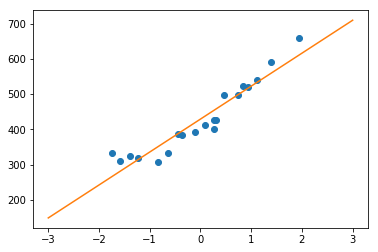

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#学習データを読み込む
train = np.loadtxt('test.csv', delimiter =',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

#プロット
plt.plot(train_x,train_y,'o')
plt.show()

#パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

#予測関数
def f(x):
    return theta0+theta1 * x
#目的関数
def E(x,y):
    return 0.5 *np.sum((y-f(x))**2)
#標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x -mu) / sigma

train_z = standardize(train_x)

#確認のためのプロット
plt.plot(train_z,train_y,'o')
plt.show()

#学習率
ETA = 1e-3

#誤差の差分
diff = 1

# 更新回数
count = 0

#学習を繰り返す
error = E(train_z,train_y)
while diff >1e-2:
    #更新結果を一時変数に保存
    tmp0 = theta0 - ETA*np.sum((f(train_z)-train_y))
    tmp1 = theta1 - ETA*np.sum((f(train_z)-train_y)*train_z)
    #パラーメタを更新
    theta0 = tmp0
    theta1 = tmp1
    # 全開の誤差との差分を計算
    current_error = E(train_z,train_y)
    diff = error- current_error
    error = current_error
    # ログの出力
    count +=1
    log = '{}回目 : theta0 = {:.3f},theta1 = {:.3f},差分={:4f}'
    print(log.format(count,theta0,theta1,diff))
    
x = np.linspace(-3,3,100)
plt.plot(train_z, train_y,'o')
#上記のパラメータでプロット
plt.plot(x,f(x))
plt.show()